# Pymaceuticals Inc.
---

### Analysis

- The original dataset were filtered to remove duplicate entries.

- Ramicane had the lowest standard deviation followed by Capomulin. Table shows 23.486704 and 24.947764 standard deviations for Ramicane and Capomulin, respectively.

- The Ramicane Drug Regimen also had the lowest standard error followed by Capomulin. The table shows 0.320955 and 0.329346 standard error for both Ramicane and Capomulin, respectively.

- Two (2) Drug Regimens (Capomulin and Ramicane) were observed more compared to the other Drug Regimens. Chart shows higher # of observed mouse timepoints for the two (2) Drug Regimens. It is possible that this is the reason why both Drug Regimens had the lowest standard deviation and errors in the dataset.

- In the experiment, there was an almost even distribution of male vs female mice tested. The chart shows 50.6% of the total mice experimented were male and 49.4% were female.

- With the four (4) sample Drug Regimens used (Capomulin, Ramicane, Infubinol, Ceftamin), data shows that only Infubinol had potential outliers. 

- Using mouse b128 as sample, they used the Drug Regimen, Capomulin. It showed a decrease in Tumor Volume during the 5 to 45 day timepoint, significantly during the 35 to 45 day timepoint.

- The mouse weight has a strong relationship with the average tumor volume. Based on the analysis, computed r-value is 0.84 and the linear regression model shows a rising red line.
 

In [1]:
# Dependencies and Setup
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
from sklearn import datasets
import pandas as pd
import scipy.stats as st
import scipy.stats as linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results, mouse_metadata, how="outer", on="Mouse ID" )

# Display the data table for preview
mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
number_mice = len(mouse_study['Mouse ID'].unique())
number_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
mouse_study.groupby(['Mouse ID','Timepoint'])

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_study.duplicated(subset=['Mouse ID','Timepoint'])
unique_duplicates = mouse_study.loc[duplicates,'Mouse ID'].unique()
unique_duplicates

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate = mouse_study.loc[mouse_study['Mouse ID']=='g989']
duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean = mouse_study.drop(861)
mouse_study_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
number_mice_2 = len(mouse_study_clean['Mouse ID'].unique())-1
number_mice_2

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_mean = mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_mean.name = 'mean'

tumor_median = mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_median.name = 'median'

stat_var = mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stat_var.name = 'var'

stat_dev = mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
stat_dev.name = 'dev'

stat_sem = mouse_study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
stat_sem.name = 'sem'

# Assemble the resulting series into a single summary DataFrame.

stat_combined = pd.merge(pd.merge(pd.merge(pd.merge(tumor_mean,tumor_median, on='Drug Regimen', how='left'),\
                       stat_var, on='Drug Regimen', how='left'),\
                       stat_dev, on='Drug Regimen', how='left'),\
                       stat_sem, on='Drug Regimen', how='left')

stat_combined = stat_combined.rename(columns={'mean':'Mean Tumor Volume','median':'Median Tumor Volume','var':'Tumor Volume Variance','dev':'Tumor Volume Std. Dev','sem':'Tumor Volume Stc. Err'})

stat_combined

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Stc. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

volume_mean = mouse_study.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':'mean'})

volume_median = mouse_study.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':'median'})

volume_var = mouse_study.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':'var'})

volume_std = mouse_study.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':'std'})

volume_sem = mouse_study.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':'sem'})

# Using the aggregation method, produce the same summary statistics in a single line
statistics_aggregate = mouse_study.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].aggregate(['mean','median','var','std','sem'])
statistics_aggregate

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

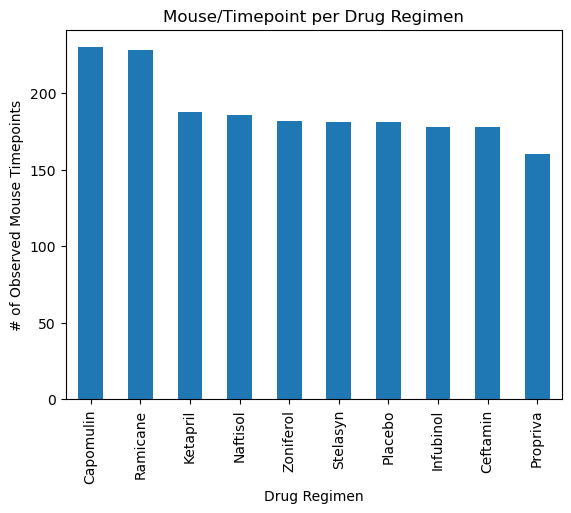

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drugs = mouse_study_clean["Drug Regimen"].value_counts()

bar_1 = drugs.plot(kind='bar',title='Mouse/Timepoint per Drug Regimen',xlabel='Drug Regimen',ylabel='# of Observed Mouse Timepoints')
xticklabels = drugs.index
plt.show()

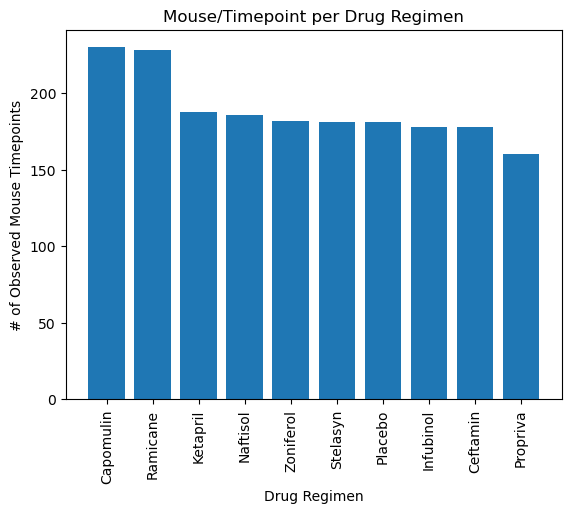

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = drugs.index
y_axis = drugs.values

plt.title('Mouse/Timepoint per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.bar(x_axis,y_axis)
plt.show()


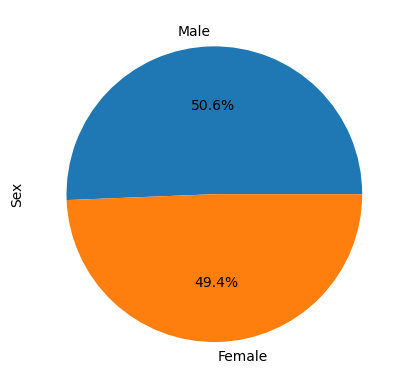

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = mouse_study_clean['Sex'].value_counts()
gender

pie_1 = gender.plot(kind='pie',y=gender, autopct='%1.1f%%')
plt.show()


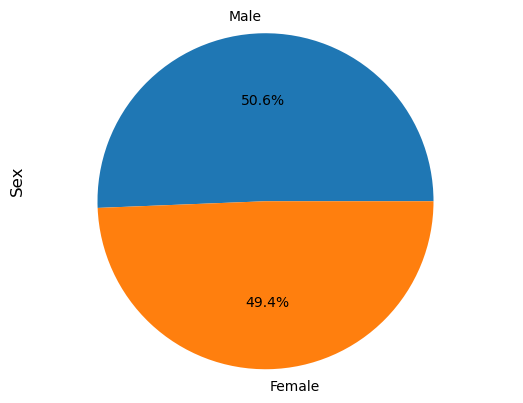

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = gender.index
number_sex = gender.values
number_sex

plt.title("Sex", x=0, y=.5, rotation=90)
plt.pie(number_sex, labels=sex, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin = mouse_study_clean.loc[mouse_study["Drug Regimen"]=="Capomulin"]
ramicane = mouse_study_clean.loc[mouse_study["Drug Regimen"]=="Ramicane"]
infubinol = mouse_study_clean.loc[mouse_study["Drug Regimen"]=="Infubinol"]
ceftamin = mouse_study_clean.loc[mouse_study["Drug Regimen"]=="Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
capomulin_last = capomulin.groupby('Mouse ID').max()['Timepoint']
capomulin_last_df = pd.DataFrame(capomulin_last)

ramicane_last = ramicane.groupby('Mouse ID').max()['Timepoint']
ramicane_last_df = pd.DataFrame(ramicane_last)

infubinol_last = infubinol.groupby("Mouse ID").max()['Timepoint']
infubinol_last_df = pd.DataFrame(infubinol_last)

ceftamin_last = ceftamin.groupby('Mouse ID').max()['Timepoint']
ceftamin_last_df = pd.DataFrame(ceftamin_last)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
cap_last_volume = pd.merge(capomulin_last_df,mouse_study,on=('Mouse ID','Timepoint'),how='left')
ram_last_volume = pd.merge(ramicane_last_df,mouse_study,on=('Mouse ID','Timepoint'),how='left')
inf_last_volume = pd.merge(infubinol_last_df,mouse_study,on=('Mouse ID','Timepoint'),how='left')
cef_last_volume = pd.merge(ceftamin_last_df,mouse_study,on=('Mouse ID'),how='left')


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
cap_tumor = cap_last_volume['Tumor Volume (mm3)']
quar_cap = cap_tumor.quantile([0.25,0.5,0.75])
cap_lower_q = quar_cap[0.25]
cap_higher_q = quar_cap[0.75]
cap_iqr = cap_higher_q-cap_lower_q

cap_lower_bound = cap_lower_q-(1.5*cap_iqr)
cap_higher_bound = cap_higher_q+(1.5*cap_iqr)

ram_tumor = ram_last_volume['Tumor Volume (mm3)']
quar_ram = ram_tumor.quantile([0.25,0.5,0.75])
ram_lower_q = quar_ram[0.25]
ram_higher_q = quar_ram[0.75]
ram_iqr = ram_higher_q-ram_lower_q

ram_lower_bound = ram_lower_q-(1.5*ram_iqr)
ram_higher_bound = ram_higher_q+(1.5*ram_iqr)

inf_tumor = inf_last_volume['Tumor Volume (mm3)']
quar_inf = inf_tumor.quantile([0.25,0.5,0.75])
inf_lower_q = quar_inf[0.25]
inf_higher_q = quar_inf[0.75]
inf_iqr = inf_higher_q-inf_lower_q

inf_lower_bound = inf_lower_q-(1.5*inf_iqr)
inf_higher_bound = inf_higher_q+(1.5*inf_iqr)

cef_tumor = cef_last_volume['Tumor Volume (mm3)']
quar_cef = cef_tumor.quantile([0.25,0.5,0.75])
cef_lower_q = quar_cef[0.25]
cef_higher_q = quar_cef[0.75]
cef_iqr = cef_higher_q-cef_lower_q

cef_lower_bound = cef_lower_q-(1.5*cef_iqr)
cef_higher_bound = cef_higher_q+(1.5*cef_iqr)

    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset 

    # Determine outliers using upper and lower bounds

cap_outliers = cap_tumor.loc[(cap_tumor<cap_lower_bound)|(cap_tumor>cap_higher_bound)]
ram_outliers = ram_tumor.loc[(ram_tumor<ram_lower_bound)|(ram_tumor>ram_higher_bound)]
inf_outliers = inf_tumor.loc[(inf_tumor<inf_lower_bound)|(inf_tumor>inf_higher_bound)]
cef_outliers = cef_tumor.loc[(cef_tumor<cef_lower_bound)|(cef_tumor>cef_higher_bound)]

print(f"Capomulin's potential outliers: {cap_outliers}")
print(f"Ramicane's potential outliers: {ram_outliers}")
print(f"Infubinol's potential outliers: {inf_outliers}")
print(f"Ceftamine's potential outliers: {cef_outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 5    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamine's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


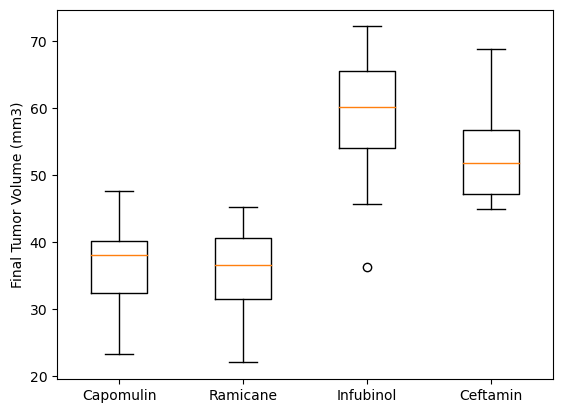

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plot_group = [cap_tumor,ram_tumor,inf_tumor,cef_tumor]

fig1,ax1=plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(plot_group, labels=['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.show()

## Line and Scatter Plots

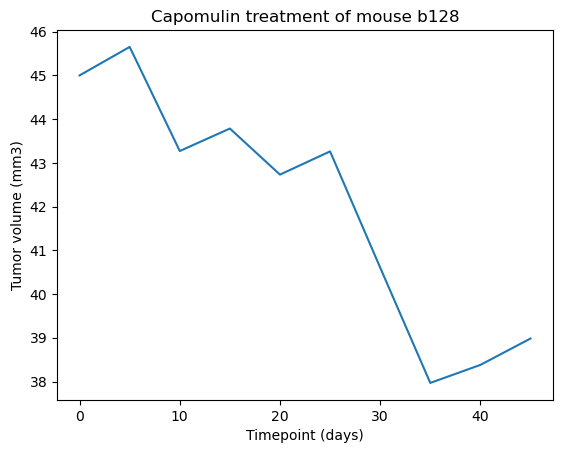

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_b128 = capomulin.loc[capomulin['Mouse ID']=='b128']

time_b128 = capomulin_b128['Timepoint'].unique()

tumor_b128 = capomulin_b128['Tumor Volume (mm3)'].unique()

plt.plot(time_b128,tumor_b128)
plt.title('Capomulin treatment of mouse b128')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor volume (mm3)')
plt.show()

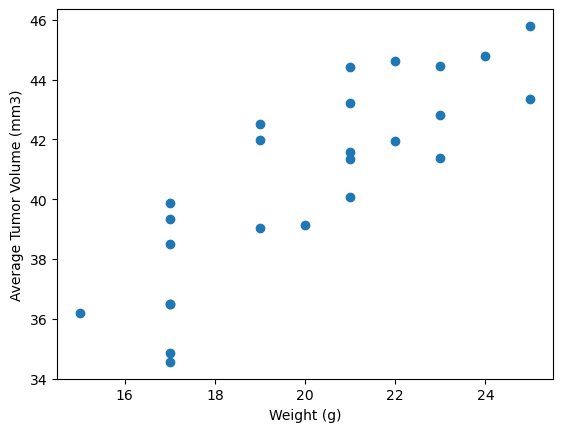

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_x_axis = capomulin.groupby('Mouse ID')['Weight (g)'].mean()
cap_y_axis = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

plt.scatter(cap_x_axis,cap_y_axis)
plt.xlabel("Weight (g)")
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between the mouse weight and the average tumor volume is 0.84


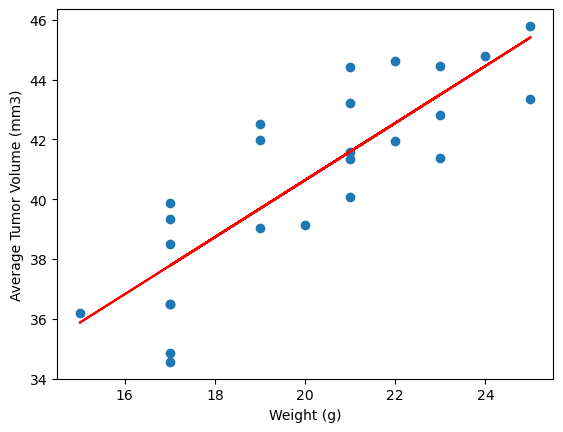

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(cap_x_axis,cap_y_axis)
print(f"The correlation between the mouse weight and the average tumor volume is {round(correlation[0],2)}")

p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(cap_x_axis,cap_y_axis)
p_fit = p_slope * cap_x_axis + p_int
plt.scatter(cap_x_axis,cap_y_axis)
plt.plot(cap_x_axis,p_fit,'r-')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()